In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_moons
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

In [2]:
from sklearn.datasets import make_blobs

#인위적인 데이터셋을 만든다.
X,y = make_blobs(random_state = 0)
#데이터와 타깃 레이블을 훈련 세트아 테스트 세트로 나눈다.
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
#모델 객체를 만들고 훈련 세트로 학습시킨다.
logreg = LogisticRegression().fit(X_train,y_train)
#모델을 테스트 세트로 평가한다.
print("테스트 세트 점수:{:.2f}".format(logreg.score(X_test,y_test)))

테스트 세트 점수:0.88


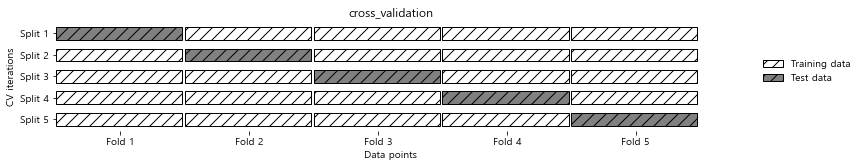

In [3]:
#교차 검증
mglearn.plots.plot_cross_validation()

In [4]:
#사이킷 런의 교차 검증
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris

iris = load_iris()
logreg = LogisticRegression(max_iter=1000)
scores = cross_val_score(logreg, iris.data, iris.target)
print("교차 검증 점수:",scores)

교차 검증 점수: [0.96666667 1.         0.93333333 0.96666667 1.        ]


In [5]:
scores = cross_val_score(logreg, iris.data, iris.target, cv=3)
print("교차 검증 점수:",scores)

교차 검증 점수: [0.98 0.96 0.98]


In [6]:
print("교차 검증 평균 점수:{:.2f}".format(scores.mean()))

교차 검증 평균 점수:0.97


In [7]:
# cross_validate는 분할마다 훈련과 테스트에 걸린 시간을 담은 딕셔너리를 추가로 반환한다. 
from sklearn.model_selection import cross_validate

res = cross_validate(logreg, iris.data, iris.target, cv=5, return_train_score=True)
display(res)

{'fit_time': array([0.02813983, 0.03567743, 0.0266304 , 0.027637  , 0.02713561]),
 'score_time': array([0.        , 0.00050354, 0.00050306, 0.00050235, 0.00050259]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ]),
 'train_score': array([0.96666667, 0.96666667, 0.98333333, 0.98333333, 0.975     ])}

In [8]:
res_df = pd.DataFrame(res)
display(res_df)
print("평균 시간과 점수:\n", res_df.mean())

,fit_time,score_time,test_score,train_score
0,0.028140,0.000000,0.966667,0.966667
1,0.035677,0.000504,1.000000,0.966667
2,0.026630,0.000503,0.933333,0.983333
3,0.027637,0.000502,0.966667,0.983333
4,0.027136,0.000503,1.000000,0.975000


평균 시간과 점수:
 fit_time       0.029044
score_time     0.000402
test_score     0.973333
train_score    0.975000
dtype: float64


In [9]:
#K개의 폴드로 나누는 것이 항상 좋지는 않다는 것을 보여주는 예시
#순서대로 레이블이 있기 때문에 이 경우 나눠지는 폴드의 데이터셋이 상당히 편향되어 있어서 정확한 수치가 나오지 않게 된다.
print("IRIS 레이블 :\n",iris.target)

IRIS 레이블 :
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


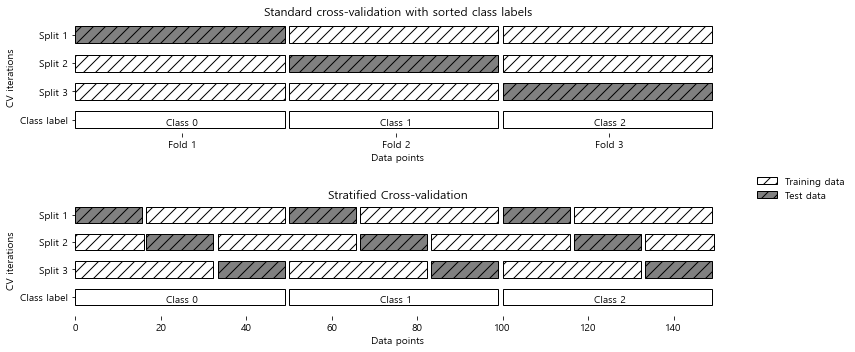

In [10]:
#k-겹 교차검증
mglearn.plots.plot_stratified_cross_validation()

In [11]:
#cv 매개변수에 교차검증 분할기를 전달한다.
#cv 내에서 매개변수 조정이 불가능하기 때문에 미리 객체를 생성하고 전달해야 한다.
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)

In [12]:
print("교차 검증 점수:\n", cross_val_score(logreg,iris.data,iris.target,cv=kfold))

교차 검증 점수:
 [1.         1.         0.86666667 0.93333333 0.83333333]


In [13]:
#기본 옵션인 3겹 교차 검증은 좋지 않은 방법이다.
kfold = KFold(n_splits=3)
print("교차 검증 점수:\n", cross_val_score(logreg,iris.data,iris.target,cv=kfold))

교차 검증 점수:
 [0. 0. 0.]


In [14]:
#셔플을 해줌으로써 위와 같은 상태를 방지할수 있다.
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
print("교차 검증 점수:\n", cross_val_score(logreg,iris.data,iris.target,cv=kfold))

교차 검증 점수:
 [0.98 0.96 0.96]


In [15]:
#LOOCV -> Leave-One-Out-Cross-Validation
#각 반복에서 하나의 데이터 포인트를 선택해 테스트 세트로 사용한다. 데이터셋의 수만큼 연산하기때문에 데이터가 많다면 연산량이 증가한다.

from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(logreg,iris.data,iris.target, cv=loo)
print(iris.data.shape)
print("교차 검증 분할 횟수:",len(scores))
print("평균 정확도:{:.2f}".format(scores.mean()))


(150, 4)
교차 검증 분할 횟수: 150
평균 정확도:0.97


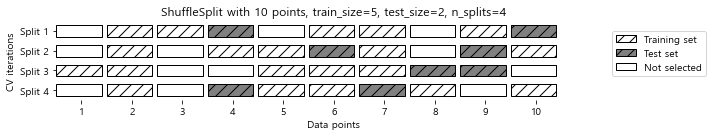

In [16]:
#임의 분할 교차 검증
#train_size 만큼 포인트로 훈련 세트를 만들고, test_size 만큼의 퐁인트로 테스트 세트를 만들도록 분할.(중복X)
#데이터셋이 커서 너무 많을 때, 일부를 버리고 몇개만을 취한다.
mglearn.plots.plot_shuffle_split()

In [17]:
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10) #테스트 사이즈 5, 훈련 사이즈 5, 10번 반복
scores = cross_val_score(logreg, iris.data,iris.target, cv=shuffle_split)
print("교차 검증 점수:\n",scores)
print("평균 정확도:{:.2f}".format(scores.mean()))

교차 검증 점수:
 [0.98666667 0.96       0.96       0.97333333 0.97333333 0.93333333
 0.96       0.97333333 0.98666667 0.94666667]
평균 정확도:0.97


In [18]:
#그룹별 교차 검증
#그룹을 나눠서 검증하기
from sklearn.model_selection import GroupKFold
#인위적인 데이터셋 생성
X,y = make_blobs(n_samples=12, random_state=0)
#처음 세 개의 샘플은 같은 그룹에 속하고 다음 네 개의 샘플이 같다.
groups = [0,0,0,1,1,1,1,2,2,3,3,3]
scores = cross_val_score(logreg,X,y,groups,cv=GroupKFold(n_splits=3))
print("교차 검증 점수:\n",scores)

교차 검증 점수:
 [0.75       0.6        0.66666667]


D:\anaconda\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass groups=[0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


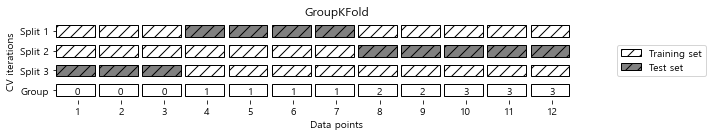

In [19]:
mglearn.plots.plot_group_kfold()

In [20]:
#반복 교차 검증
#데이터가 적을 경우 여러 번 반복하여 검증한다.
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold

rskfold = RepeatedStratifiedKFold(random_state=42)
scores = cross_val_score(logreg,iris.data,iris.target,cv = rskfold)

print("교차 검증 점수:\n",scores)
print("교차 검증 평균 점수:{:.2f}".format(scores.mean()))

교차 검증 점수:
 [1.         0.96666667 0.93333333 1.         0.93333333 0.96666667
 0.96666667 0.93333333 1.         0.96666667 0.93333333 1.
 1.         0.96666667 0.96666667 0.9        1.         1.
 0.93333333 0.96666667 0.93333333 0.96666667 0.96666667 1.
 0.96666667 1.         0.96666667 0.96666667 0.9        1.
 0.96666667 0.96666667 0.96666667 0.96666667 0.93333333 0.96666667
 0.96666667 1.         1.         0.9        0.96666667 1.
 0.9        0.96666667 0.96666667 0.9        0.96666667 0.96666667
 1.         0.96666667]
교차 검증 평균 점수:0.96


In [21]:
#그리드 서치
#매개변수를 튜니앟여 일반화 성능 개선하기
#각 매개변수 옵션 표를 만들어 가장 높은 점수가 나오는 매개변수를 선택한다.

from sklearn.svm import SVC
X_train,X_test,y_train,y_test = train_test_split(iris.data,iris.target,random_state=0)
print("훈련 세트의 크기:{}      테스트 세트의 크기:{}".format(X_train.shape[0],X_test.shape[0]))

best_score =  0

#for 반복문으로 구현
for gamma in [0.001,0.01,0.1,1,10,100]:
    for C in [0.001,0.01,0.1,1,10,100]:
        #매개변수의 각 조합에 대해 SVC 를 훈련시킨다.
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train,y_train)
        #테스트 세트로 SVC를 평가한다.
        score = svm.score(X_test,y_test)
        #점수가 더 높으면 매개변수와 함께 기록한다.
        if score > best_score:
            best_score=score
            best_parameters = {'C':C,"gamma":gamma}
            
    
print("최고 점수:{:.2f}".format(best_score))
print("최고 매개변수:",best_parameters)

훈련 세트의 크기:112      테스트 세트의 크기:38
최고 점수:0.97
최고 매개변수: {'C': 100, 'gamma': 0.001}


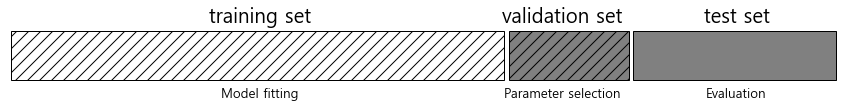

In [22]:
#매개변수 과대적합과 검증 세트
#검증 세트를 사용해 최적의 매개변수를 선택한 후, 그 매개변수에서 훈련 세트와 검증세트를 다시 합쳐 모델을 만든다.
mglearn.plots.plot_threefold_split()

In [23]:
#데이터를 훈련+검증 세트 그리고 테스트 세트로 분할
X_trainval, X_test, y_trainval, y_test = train_test_split(iris.data, iris.target, random_state=0)
#훈련 + 검증 세트를 훈련 세트와 검증 세트로 분할
X_train,X_valid,y_train,y_valid = train_test_split(X_trainval,y_trainval, random_state=1)
print("훈련 세트의 크기:{} 검증 세트의 크기:{} 테스트 세트의 크기:{}\n".format(X_train.shape[0],X_valid.shape[0],X_test.shape[0]))

best_score = 0

for gamma in [0.001,0.01,0.1,1,10,100]:
    for C in [0.001,0.01,0.1,1,10,100]:
        #매개변수의 각 조합에 대해 SVC 를 훈련시킨다.
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train,y_train)
        #검증 세트로 SVC를 평가한다.
        score = svm.score(X_valid,y_valid)
        #점수가 더 높으면 매개변수와 함께 기록한다.
        if score > best_score:
            best_score=score
            best_parameters = {'C':C,"gamma":gamma}
            
#훈련 세트와 검증 세트를 합쳐 모델을 다시 만든 후 테스트 세트를 평가한다.
svm = SVC(**best_parameters)
svm.fit(X_trainval,y_trainval)
test_score = svm.score(X_test,y_test)
print("검증 세트에서 최고 점수:{:.2f}".format(best_score))
print("최적 매개변수:", best_parameters)
print("최적 매개변수에서 테스트 세트 점수:{:.2f}".format(test_score))

훈련 세트의 크기:84 검증 세트의 크기:28 테스트 세트의 크기:38

검증 세트에서 최고 점수:0.96
최적 매개변수: {'C': 10, 'gamma': 0.001}
최적 매개변수에서 테스트 세트 점수:0.92


In [24]:
#교차 검증을 사용한 그리드 서치
#훈련세트와 검증세트를 한 번만 나누지 않고, 교차 검증을 사용해서 각 매개변수 조합의 성능을 평가할 수 있다.

for gamma in [0.001,0.01,0.1,1,10,100]:
    for C in [0.001,0.01,0.1,1,10,100]:
        #매개변수의 각 조합에 대해 SVC 를 훈련시킨다.
        svm = SVC(gamma=gamma, C=C)
        #교차 검증을 적용한다.
        scores = cross_val_score(svm,X_trainval,y_trainval, cv=5)
        #교차 검증 정확도의 평균을 계산한다.
        score = np.mean(scores)
        #점수가 더 높으면 매개변수와 함께 기록한다.
        if score > best_score:
            best_score=score
            best_parameters = {'C':C,"gamma":gamma}
#훈련 세트와 검증 세트를 합쳐 모델을 다시 만든다.
svm = SVC(**best_parameters)
svm.fit(X_trainval,y_trainval)

SVC(C=10, gamma=0.1)

In [ ]:
mglearn.plots.plot_cross_val_selection()

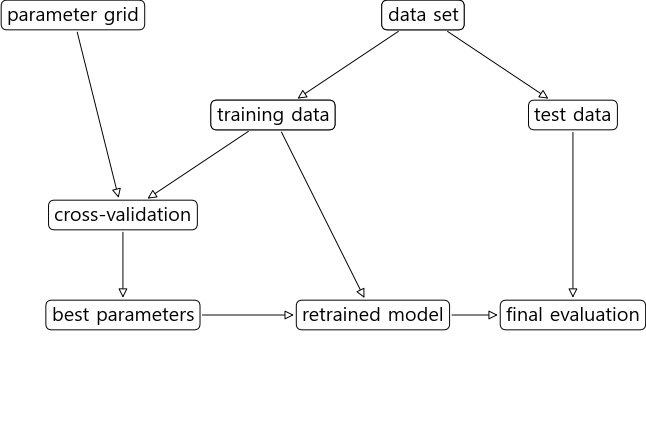

In [25]:
#교차 검증과 그리드 서치를 사용한 매개변수 선택과 모델 평가의 작업 흐름
mglearn.plots.plot_grid_search_overview()

In [26]:
#미리 딕셔너리를 만들어 놓고 사용하기
param_grid = {'C':[0.001,0.01,0.1,1,10,100],'gamma':[0.001,0.01,0.1,1,10,100]}
print("매개변수 그리드 :\n",param_grid)

매개변수 그리드 :
 {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [27]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(SVC(),param_grid,cv=5,return_train_score=True)

In [28]:
X_train,X_test,y_train,y_test = train_test_split(iris.data,iris.target,random_state=0)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

In [29]:
print("테스트 세트 점수:{:.3f}".format(grid_search.score(X_test,y_test)))

테스트 세트 점수:0.974


In [30]:
#책하고다름??
print("최적 매개변수:", grid_search.best_params_)
print("최고 교차 검증 점수:{:.2f}".format(grid_search.best_score_))

최적 매개변수: {'C': 10, 'gamma': 0.1}
최고 교차 검증 점수:0.97


In [31]:
print("최고 성능 모델:\n",grid_search.best_estimator_)

최고 성능 모델:
 SVC(C=10, gamma=0.1)


In [32]:
pd.set_option('display.max_columns',None)
#DataFrame으로 변환합니다.
results = pd.DataFrame(grid_search.cv_results_)
#처음 다섯 개 행을 출력한다.
display(np.transpose(results.head()))

,0,1,2,3,4
mean_fit_time,0.00100403,0.000905561,0.00100241,0.00080409,0.00100598
std_fit_time,8.17605e-07,0.000376281,4.15314e-06,0.000246177,1.92278e-06
mean_score_time,0.000402164,0.000501347,0.000203323,0.000301552,0.000401115
std_score_time,0.000201083,0.000317865,0.00024905,0.000246216,0.000200575
param_C,0.001,0.001,0.001,0.001,0.001
param_gamma,0.001,0.01,0.1,1,10
params,"{'C': 0.001, 'gamma': 0.001}","{'C': 0.001, 'gamma': 0.01}","{'C': 0.001, 'gamma': 0.1}","{'C': 0.001, 'gamma': 1}","{'C': 0.001, 'gamma': 10}"
split0_test_score,0.347826,0.347826,0.347826,0.347826,0.347826
split1_test_score,0.347826,0.347826,0.347826,0.347826,0.347826
split2_test_score,0.363636,0.363636,0.363636,0.363636,0.363636


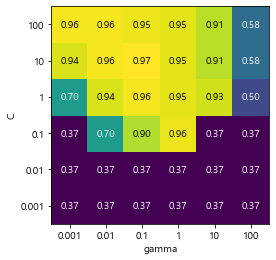

In [33]:
scores = np.array(results.mean_test_score).reshape(6,6)

#교차 검증 평균 점수 히트맵 그래프
#C와 gamma 값에 따른 교차 검증 평균 점수의 히트맵
#매개변수 선택이 얼마나 중요한지 잘 보여주고 있다.
mglearn.tools.heatmap(scores,xlabel='gamma', xticklabels=param_grid['gamma'],ylabel='C',yticklabels=param_grid['C'],cmap='viridis')

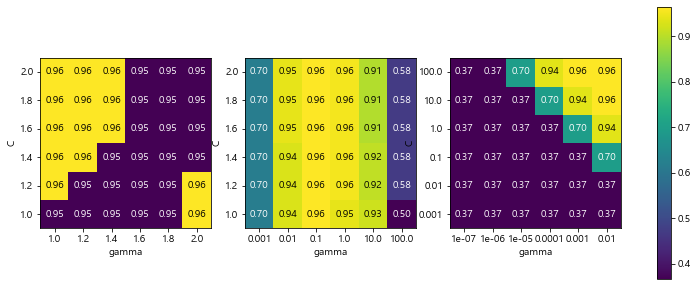

In [34]:
fig,axes = plt.subplots(1,3,figsize=(13,5))

param_grid_linear = {'C':np.linspace(1,2,6),'gamma':np.linspace(1,2,6)}

param_grid_one_log = {'C':np.linspace(1,2,6),'gamma':np.logspace(-3,2,6)}

param_grid_range = {'C':np.logspace(-3,2,6),'gamma':np.logspace(-7,-2,6)}

for param_grid, ax in zip([param_grid_linear, param_grid_one_log,param_grid_range],axes):
    grid_search = GridSearchCV(SVC(),param_grid,cv=5)
    grid_search.fit(X_train,y_train)
    scores = grid_search.cv_results_['mean_test_score'].reshape(6,6)
    
    #교차 검증 평균 점수의 히트맵 그래프
    scores_image = mglearn.tools.heatmap(
        scores,xlabel='gamma',ylabel='C',xticklabels=param_grid['gamma'],yticklabels=param_grid['C'], cmap='viridis', ax=ax)
    
plt.colorbar(scores_image, ax=axes.tolist())
#첫번째는 C와 gamma 의 스케일과 범위가 부적절 한 경우이다. 혹은 매개변수가 별로 중요하지 않은 데이터셋일 수도 있다.
#두 번째는 C가 영향을 주지 못하고 있다. C 매개변수가 범위가 부적절하거나 gamma 변수만이 영향을 미칠수도 있다.
#세 번째는 오른쪽 아래가 포함되도록 매개변수 검색 범위를 바꿔줘야 한다.

In [35]:
#비대칭 매개변수 그리드 탐색
#아래 그리드는 kernel 을 기준으로 각 독립된 매개변수를 전달한다.
param_grid = [
    {'kernel':['rbf'],
    'C':[0.001,0.01,0.1,1,10,100],
    'gamma':[0.001,0.01,0.1,1,10,100]},
    {'kernel':['linear'],
    'C':[0.001,0.01,0.1,1,10,100]}
]
print("그리드 목록:\n",param_grid)

그리드 목록:
 [{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]


In [36]:
#책하고 값이 다르네.
grid_search = GridSearchCV(SVC(),param_grid,cv=5,return_train_score=True)
grid_search.fit(X_train,y_train)
print("최적 파라미터:",grid_search.best_params_)
print("최고 교차 검증 점수:{:.2f}".format(grid_search.best_score_))

최적 파라미터: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
최고 교차 검증 점수:0.97


In [37]:
#커널이 linear 일때는 gamma 값이 없고 C값만 변경 된 사실을 확인할 수 있다.
results = pd.DataFrame(grid_search.cv_results_)
#좀 더 나은 출력을 위해 결과를 전치시킵니다.
display(results.T)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
mean_fit_time,0.000905132,0.00131073,0.000902987,0.000802088,0.000601339,0.00110254,0.000904274,0.000701857,0.000802135,0.000802565,0.00110679,0.0012054,0.00100532,0.000904655,0.000909615,0.00100598,0.00120916,0.00120606,0.00100355,0.000702333,0.000605583,0.000603485,0.00100131,0.0012064,0.000704002,0.000605345,0.000604296,0.000601053,0.0011055,0.00110612,0.000805473,0.000606298,0.000599718,0.00070138,0.00110846,0.00130839,0.000802326,0.000803804,0.000605154,0.000605583,0.000503206,0.000501871
std_fit_time,0.000376803,0.000404158,0.00020009,0.000244177,0.000201579,0.000201692,0.000200963,0.000244361,0.000244798,0.000244661,0.000204182,0.000245821,1.25798e-06,0.000206681,0.000202957,1.14441e-06,0.000244621,0.000245168,4.22048e-06,0.00024683,0.000205029,0.000201559,4.84031e-06,0.000246061,0.000246393,0.000204618,0.000204702,0.000202097,0.000201727,0.00020048,0.000245954,0.000198383,0.000197126,0.000243219,0.000203261,0.000243511,0.000244371,0.000245944,0.000200166,0.000199706,4.42201e-07,9.65522e-07
mean_score_time,0.000702572,0.000501871,0.00030303,0.000301361,0.000400019,0.00020113,0.000200939,0.000404263,0.000301361,0.000401497,0.000399876,0.000401831,0.000200939,0.000502157,0.000398493,0.000301027,0.000301504,0.000497866,0.000301409,0.000300407,0.000299501,0.000502253,0.000200844,0.000303793,0.000100517,0.000401258,0.000403214,0.000402021,0.000502825,0.000501966,0.000400591,0.000200796,0.000300074,0.000403881,0.000400352,0.000403929,0.000301409,0.000301456,0.000401545,0,0.000198984,0.000504732
std_score_time,0.000246197,0.00031764,0.00024745,0.00024606,0.000200057,0.000246333,0.000246099,0.000202163,0.000246061,0.000200749,0.000199975,0.000200917,0.0002461,6.34462e-06,0.000199284,0.00024579,0.000246179,4.82855e-06,0.000246099,0.000245291,0.000244569,4.90934e-07,0.000245982,0.000248074,0.000201035,0.000200685,0.000201667,0.000201011,5.64201e-07,2.69993e-06,0.000200312,0.000245924,0.000245046,0.000201997,0.000200202,0.000202006,0.000246099,0.000246138,0.000200773,0,0.000243728,3.6095e-06
param_C,0.001,0.001,0.001,0.001,0.001,0.001,0.01,0.01,0.01,0.01,0.01,0.01,0.1,0.1,0.1,0.1,0.1,0.1,1,1,1,1,1,1,10,10,10,10,10,10,100,100,100,100,100,100,0.001,0.01,0.1,1,10,100
param_gamma,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,NaN,NaN,NaN,NaN,NaN,NaN
param_kernel,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,linear,linear,linear,linear,linear,linear
params,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 100, 'kernel': 'rbf'}","{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 1, 'gamma': 1, 'kernel': 'rbf'}","{'C': 1, 'gamma': 10, 'kernel': 'rbf'}","{'C': 1, 'gamma': 100, 'kernel': 'rbf'}","{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 10, 'gamma': 1, 'kernel': 'rbf'}","{'C': 10, 'gamma': 10, 'kernel': 'rbf'}","{'C': 10, 'gamma': 1

In [38]:
#중첩 교차 검증
#얼마나 잘 일반화를 하는가?

param_grid = {'C':[0.001,0.01,0.1,1,10,100],
             'gamma':[0.001,0.01,0.1,1,10,100]}
scores = cross_val_score(GridSearchCV(SVC(),param_grid,cv=5),iris.data,iris.target,cv=5)
print("교차 검증 점수: ",scores)
print("교차 검증 평균 점수",scores.mean())
print(param_grid)

교차 검증 점수:  [0.96666667 1.         0.96666667 0.96666667 1.        ]
교차 검증 평균 점수 0.9800000000000001
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [39]:
def nested_cv(X,y, inner_cv, outer_cv, Classifier, parameter_grid):
    outer_scores=[]
    #outer_cv의 분할을 순회하는 for 루프
    # (split 메소드는 훈련과 테스트 세트에 해당하는 인덱스를 반환한다.)
    for training_samples, test_samples in outer_cv.split(X,y):
        #최적의 매개변수를 찾습니다.
        best_parms={}
        best_scores=-np.inf
        #매개변수 그리드를 순회합니다.
        for parameters in  parameter_grid:
            #안쪽 교차 검증의 점수를 기록합니다.
            cv_scores=[]
            #inner_cv의 분할을 순회하는 for 루프
            for inner_train,inner_test in inner_cv.split(X[training_samples],y[training_samples]):
                #훈련 데이터와 주어진 매개변수를 분류기로 만듭니다.
                clf = Classifier(**parameters)
                clf.fit(X[inner_train],y[inner_train])
                #검증 세트로 평가합니다.
                score = clf.score(X[inner_test],y[inner_test])
                cv_scores.append(score)
            #안쪽 교차 검증의 평균 점수를 계산합니다.
            mean_score = np.mean(cv_scores)
            if mean_score > best_scores:
                #점수가 더 높으면 매개변수와 함께 기록합니다.
                best_scores = mean_score
                best_params = parameters
        #바깥쪽 훈련 데이터 전체를 사용해 분류기를 만듭니다.
        clf = Classifier(**best_params)    
        clf.fit(X[training_samples],y[training_samples])
        #테스트 세트를 사용해 평가합니다.
        outer_scores.append(clf.score(X[test_samples],y[test_samples]))
    return np.array(outer_scores)

In [40]:
from sklearn.model_selection import ParameterGrid, StratifiedKFold
scores = nested_cv(iris.data,iris.target,StratifiedKFold(5),StratifiedKFold(5),SVC,ParameterGrid(param_grid))
print("교차 검증 점수:",scores)

교차 검증 점수: [0.96666667 1.         0.96666667 0.96666667 1.        ]


In [42]:
#평가 지표와 측정

#이진 분류의 평가 지표
#거짓음성을 최대한 줄이는 방면으로
#불균형 데이터셋 -> 한 클래스가 다른 클래스들 보다 훨씬 많은 데이터셋을 보유한 것을 의미한다.

from sklearn.datasets import load_digits

digits = load_digits()
y = digits.target==9

X_train,X_test,y_train,y_test = train_test_split(digits.data,y,random_state=0)

In [44]:
#항상 다수인 클래스(여기서는 '9아님')을 예측값으로 내놓는다.
from sklearn.dummy import DummyClassifier
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train,y_train)
pred_most_frequent = dummy_majority.predict(X_test)
print("에측된 레이블의 레이블:", np.unique(pred_most_frequent))
print("테스트 점수: {:.2f}".format(dummy_majority.score(X_test,y_test)))

에측된 레이블의 레이블: [False]
테스트 점수: 0.90


In [45]:
#점수 측면에서 그렇게 차이가 나지 않는다. 정확도로 측정하는 방식이 옳지 않을 수 있다.
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train,y_train)
pred_tree = tree.predict(X_test)
print("테스트 점수:{:.2f}".format(tree.score(X_test,y_test)))

테스트 점수:0.92


In [47]:
#로지스틱 회귀로는 높은 점수를 보여주엇으나 더미로 측정해보앗는데도 점수가 괜찮게 나왔다.
#불균형 데이터셋에서 예측 성능을 정량화 하는데 정확도는 적절한 측정방법이 아니다.
dummy = DummyClassifier(strategy='stratified').fit(X_train,y_train)
pred_dummy = dummy.predict(X_test)
print('dummy 점수:{:.2f}'.format(dummy.score(X_test,y_test)))

logreg = LogisticRegression(C=0.1,max_iter=1000).fit(X_train,y_train)
pred_logreg = logreg.predict(X_test)
print("로지스틱 회귀 점수:{:.2f}".format(logreg.score(X_test,y_test)))

dummy 점수:0.81
로지스틱 회귀 점수:0.98


In [48]:
#오차 행렬(confusion matrix)
#이진 분류 평가 결과를 나타낼 때 가장 널리 사용하는 방법 중 하나
#책하고 다름. 책은 [[401,2],[8,39]] why??
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test,pred_logreg)
print("오차 행렬:\n",confusion)

오차 행렬:
 [[402   1]
 [  6  41]]


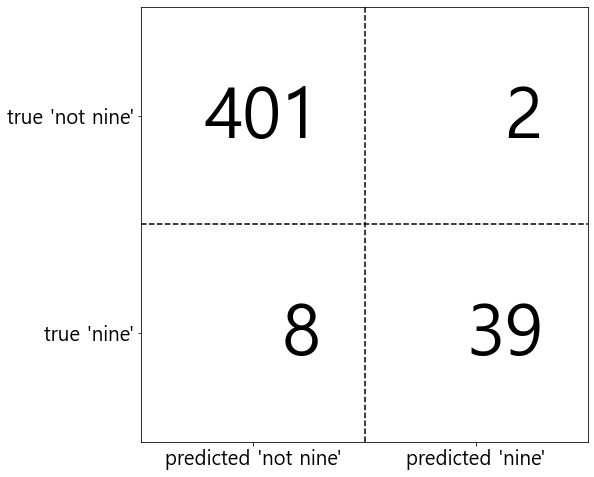

In [49]:
mglearn.plots.plot_confusion_matrix_illustration()

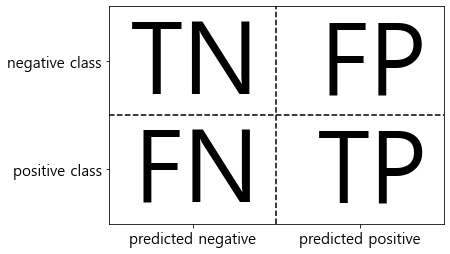

In [50]:
mglearn.plots.plot_binary_confusion_matrix()
#

In [51]:
#각 데이터를 기반으로 한 오차행렬
print("빈도 기반 더미 모델:")
print(confusion_matrix(y_test,pred_most_frequent))
print("\n무작위 더미 모델:")
print(confusion_matrix(y_test,pred_dummy))
print("\n결정트리:")
print(confusion_matrix(y_test,pred_tree))
print("\n로지스틱 회귀")
print(confusion_matrix(y_test,pred_logreg))

빈도 기반 더미 모델:
[[403   0]
 [ 47   0]]

무작위 더미 모델:
[[359  44]
 [ 43   4]]

결정트리:
[[390  13]
 [ 24  23]]

로지스틱 회귀
[[402   1]
 [  6  41]]


In [52]:
#정밀도와 재현율의 조화 평균인 Fscore
#f1score = 2*(정밀도*재현율)/(정밀도+재현율)

from sklearn.metrics import f1_score
print("빈도 기반 더미 모델의 f1 score: {:.2f}".format(f1_score(y_test,pred_most_frequent)))
print("무작위 더미 모델의 f1 score:{:.2f}".format(f1_score(y_test,pred_dummy)))
print("트리 모델의 f1 score:{:.2f}".format(f1_score(y_test,pred_tree)))
print("로지스틱 회귀 모델의 f1 score:{:.2f}".format(f1_score(y_test,pred_logreg)))
#양성 클래스로 예측된 것이 없어서 빈도기반 더미 모델은 에러가 난다.
#그리고 무작위 더미 분류기와 트리 분류기 사이에서도 정확도에서는 보기 힘들었던 뚜렷한 차이를 확인할 수 있다.

빈도 기반 더미 모델의 f1 score: 0.00
무작위 더미 모델의 f1 score:0.08
트리 모델의 f1 score:0.55
로지스틱 회귀 모델의 f1 score:0.92


In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_most_frequent,target_names=["9아님","9"]))

              precision    recall  f1-score   support

         9아님       0.90      1.00      0.94       403
           9       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [54]:
#더미분류기
print(classification_report(y_test,pred_dummy,target_names=['9아님','9']))

              precision    recall  f1-score   support

         9아님       0.89      0.89      0.89       403
           9       0.08      0.09      0.08        47

    accuracy                           0.81       450
   macro avg       0.49      0.49      0.49       450
weighted avg       0.81      0.81      0.81       450



In [56]:
#로지스틱 회귀
print(classification_report(y_test,pred_logreg,target_names=['9아님','9']))

              precision    recall  f1-score   support

         9아님       0.99      1.00      0.99       403
           9       0.98      0.87      0.92        47

    accuracy                           0.98       450
   macro avg       0.98      0.93      0.96       450
weighted avg       0.98      0.98      0.98       450



In [57]:
#불확실성 고려
X,y = make_blobs(n_samples=(400,50), cluster_std=[7.0,2], random_state=22)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
svc = SVC(gamma=.05).fit(X_train,y_train)

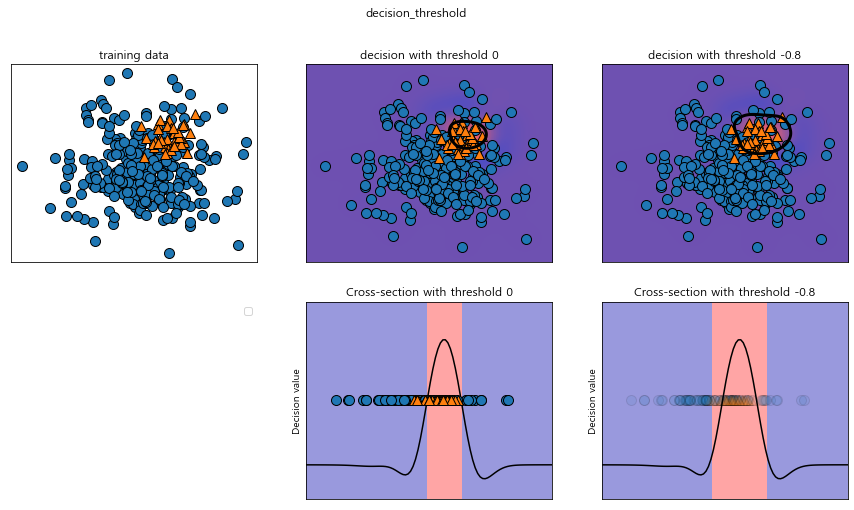

In [58]:
mglearn.plots.plot_decision_threshold()

In [60]:
print(classification_report(y_test,svc.predict(X_test)))
#클래스 1에 대해 상당히 적은 정밀도를 얻었다. 클래스 0의 개수가 많으므로 분류기가 클래스 0에 더 초점이 맞춰지고 있다.

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       104
           1       0.35      0.67      0.46         9

    accuracy                           0.88       113
   macro avg       0.66      0.78      0.70       113
weighted avg       0.92      0.88      0.89       113



In [61]:
y_pred_lower_threshold = svc.decision_function(X_test) > -.8

In [62]:
print(classification_report(y_test,y_pred_lower_threshold))
# 클래스 1의 정밀도가 줄어들고  재현율이 높아진 것을 확인할 수 있다.
#결정함수의 임계값을 조정해 정밀도와 재현율의 중요도를 조정할 수 있다.

              precision    recall  f1-score   support

           0       1.00      0.82      0.90       104
           1       0.32      1.00      0.49         9

    accuracy                           0.83       113
   macro avg       0.66      0.91      0.69       113
weighted avg       0.95      0.83      0.87       113



In [70]:
#정밀도 재현율 곡선과 ROC 곡선
#재현율과 정밀도는 서로 반비례한다. (둘 중에 하나는 손해를 봐야한다.)
#precision_recall_curve 가능한 모든 임계값에 대해 정밀도와 재현율의 값을 정렬된 리스트로 반환해준다.
from sklearn.metrics import precision_recall_curve

precision,recall,thresholds = precision_recall_curve(y_test,svc.decision_function(X_test))

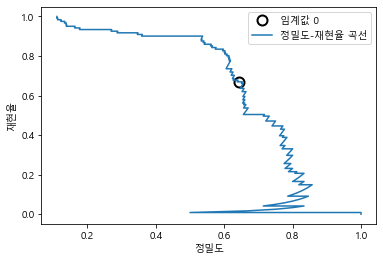

In [76]:
#부드러운 곡선을 위해 데이터 포인트 수를 늘린다.
X,y = make_blobs(n_samples=(4000,500), cluster_std=[7.0,2], random_state=22)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
svc = SVC(gamma=.05).fit(X_train,y_train)

precision,recall,thresholds = precision_recall_curve(y_test,svc.decision_function(X_test))
#0에 가까운 임계값을 찾는다.
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero],recall[close_zero],'o',markersize=10, label='임계값 0',fillstyle = 'none', c='k', mew=2)

plt.plot(precision,recall,label='정밀도-재현율 곡선')
plt.xlabel("정밀도")
plt.ylabel('재현율')
plt.legend(loc = "best")
#곡선이 오른쪽 위로 갈수록 좋은 그래프이다.

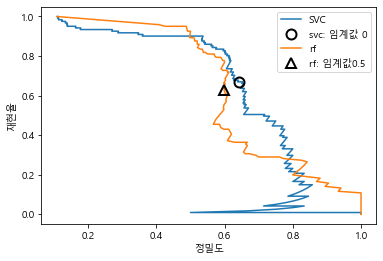

In [77]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train,y_train)

#RandomForestClassifier 는 decision_function 대신에 predict_proba 를 제공한다.
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test,rf.predict_proba(X_test)[:,1])

plt.plot(precision,recall,label='SVC')

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10, label='svc: 임계값 0', fillstyle='none',c='k',mew=2)
plt.plot(precision_rf,recall_rf,label='rf')

close_default_rf = np.argmin(np.abs(thresholds_rf -0.5))
plt.plot(precision_rf[close_default_rf],recall_rf[close_default_rf],'^',c='k',markersize=10,label='rf: 임계값0.5',fillstyle='none', mew=2)
plt.xlabel("정밀도")
plt.ylabel("재현율")
plt.legend(loc='best')

#그래프가 극단적인 부분에서는 rf가 조금 더 좋은 모습을 보여준다.
#가운데 지점에서는 SVM 이 조금더 좋은 모습을 보여준다.

In [79]:
#f1 score 확인해보기
print("랜덤포레스트의 f1 점수 :{:.3f}".format(f1_score(y_test,rf.predict(X_test))))
print("svc 의 f1 점수 :{:.3f}".format(f1_score(y_test,svc.predict(X_test))))

랜덤포레스트의 f1 점수 :0.610
svc 의 f1 점수 :0.656


In [80]:
#그래프의 아래 면적 계산하기 -> 평균 정밀도 average_precision_score
from sklearn.metrics import average_precision_score
ap_rf = average_precision_score(y_test,rf.predict_proba(X_test)[:,1])
ap_svc = average_precision_score(y_test,svc.decision_function(X_test))
print("랜덤 포레스트의 평균 정밀도:{:.3f}".format(ap_rf))
print("SVC 의 평균 정밀도:{:.3f}".format(ap_svc))

#SVC 가 조금더 높긴하지만 그렇게 큰 차이는 나지 않는다. 

랜덤 포레스트의 평균 정밀도:0.660
SVC 의 평균 정밀도:0.666


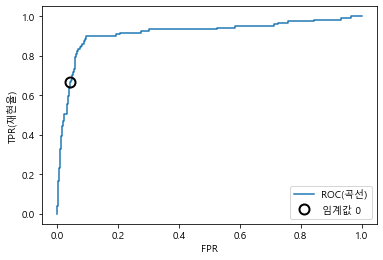

In [81]:
#ROC 곡선은 진짜양성비율(TPR), 거짓 양성비율(FPR)로 나타낸다.
#FPR  = FP / (FP+TN)
from sklearn.metrics import roc_curve
fpr , tpr, thresholds = roc_curve(y_test,svc.decision_function(X_test))

plt.plot(fpr,tpr,label="ROC(곡선)")
plt.xlabel("FPR")
plt.ylabel("TPR(재현율)")
#0 근처의 임계값을 찾는다.
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero],tpr[close_zero],'o', markersize=10, label='임계값 0', fillstyle='none', c='k', mew=2)
plt.legend(loc=4)

#SVC 의 ROC 곡선

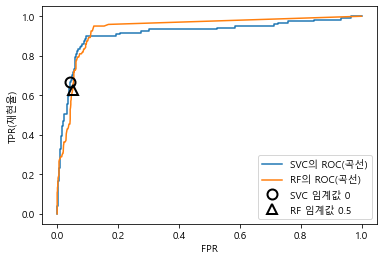

In [82]:
#ROC 곡선은 왼쪽위에 가까울수록 이상적이다. 거짓양성비율이 낮게 유지되면서 재현율이 높아지는 것이 이상적이다.

fpr_rf, tpr_rf,thresholds_rf = roc_curve(y_test,rf.predict_proba(X_test)[:,1])

plt.plot(fpr,tpr,label="SVC의 ROC(곡선)")
plt.plot(fpr_rf,tpr_rf,label="RF의 ROC(곡선)")
plt.xlabel("FPR")
plt.ylabel("TPR(재현율)")
#0 근처의 임계값을 찾는다.
plt.plot(fpr[close_zero],tpr[close_zero],'o', markersize=10, label='SVC 임계값 0', fillstyle='none', c='k', mew=2)
close_zero_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(fpr_rf[close_zero_rf],tpr_rf[close_zero_rf],'^', markersize=10, label='RF 임계값 0.5', fillstyle='none', c='k', mew=2)
plt.legend(loc=4)

In [84]:
#보통 곡선 아래의 면적값 하나로 ROC 곡선을 요약한다.
from sklearn.metrics import roc_auc_score
rf_auc = roc_auc_score(y_test,rf.predict_proba(X_test)[:,1])
svc_auc = roc_auc_score(y_test,svc.decision_function(X_test))
print("랜덤 포레스트의 AUC:{:.3f}".format(rf_auc))
print("SVC의 AUC:{:.3f}".format(svc_auc))

#랜덤 포레스트가 조금 더 좋은 성능을 보여주는 것을 확인할 수 있다.

랜덤 포레스트의 AUC:0.937
SVC의 AUC:0.916


gamma = 1.00 정확도 = 0.90 AUC = 0.50
gamma = 0.10 정확도 = 0.90 AUC = 0.96
gamma = 0.01 정확도 = 0.90 AUC = 1.00


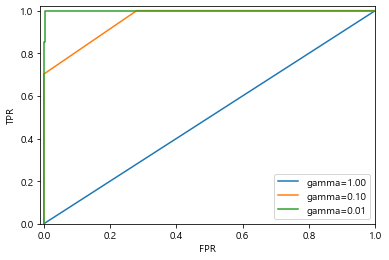

In [85]:
#앞에서 본 digits 데이터에서 9와 다른 숫자를 구분하는 문제를 다시 풀어보자.
y = digits.target ==9
X_train,X_test,y_train,y_test = train_test_split(digits.data,y,random_state=0)
plt.figure()

for gamma in [1,0.1,0.01]:
    svc = SVC(gamma=gamma).fit(X_train,y_train)
    accuracy = svc.score(X_test,y_test)
    auc = roc_auc_score(y_test,svc.decision_function(X_test))
    fpr, tpr, _ = roc_curve(y_test,svc.decision_function(X_test))
    print('gamma = {:.2f} 정확도 = {:.2f} AUC = {:.2f}'.format(gamma,accuracy,auc))
    plt.plot(fpr,tpr,label='gamma={:.2f}'.format(gamma))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.xlim(-0.01,1)
plt.ylim(0,1.02)
plt.legend(loc='best')

#gamma 값에 대한 정확도는 모두 같지만 AUC 는 다른 것을 확인할 수 있다.
#불균형 데이터셋에는 정확도 보다는 AUC 를 사용해 평가하는 것을 권장한다.

In [86]:
#다중 분류의 평가 지표 (n개 이상의 클래스)
from sklearn.metrics import accuracy_score
X_train,X_test,y_train,y_test = train_test_split(digits.data,digits.target,random_state=0)
lr = LogisticRegression(solver='liblinear',multi_class='ovr').fit(X_train,y_train)
pred = lr.predict(X_test)
print("정확도 :{:.3f}".format(accuracy_score(y_test,pred)))
print("오차 행렬:\n",confusion_matrix(y_test,pred))

#정확도는 약 95퍼로 꽤 좋은 성능을 보여준다. 실제 오차 행렬을 보면 일부 몇개를 제외하고는 숫자를 거의 완벽하게 분류하는 것을 볼 수 있다.

정확도 :0.953
오차 행렬:
 [[37  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  2  0  2  0]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  1 43  0  0  0  0  0  1]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  1  0  0  0 47  0  0  0  0]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  1  0  1  1  0  0 45  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  1  0  1  0  0  1 44]]


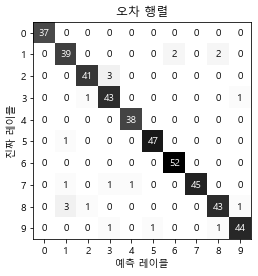

In [88]:
scores_image = mglearn.tools.heatmap(confusion_matrix(y_test,pred),xlabel='예측 레이블',ylabel='진짜 레이블',
                                    xticklabels=digits.target_names,yticklabels=digits.target_names,cmap=plt.cm.gray_r, fmt='%d')
plt.title("오차 행렬")
plt.gca().invert_yaxis()

In [89]:
#위 데이터를 바탕으로 정밀도,재현율,f1 - score 점수를 계산해보자.
print(classification_report(y_test,pred))

#숫자 0에는 오차가 없엇으므로 정밀도, 재현율이 100퍼센트가 나온다.
#클래스 7은 다른 클래스가 7로 잘못분류한 것이 없어서 정밀도가 100퍼센트이다.
#클래스 6은 거짓 음성이 없으므로 재현율이 100퍼센트이다.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.89      0.91      0.90        43
           2       0.95      0.93      0.94        44
           3       0.90      0.96      0.92        45
           4       0.97      1.00      0.99        38
           5       0.98      0.98      0.98        48
           6       0.96      1.00      0.98        52
           7       1.00      0.94      0.97        48
           8       0.93      0.90      0.91        48
           9       0.96      0.94      0.95        47

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



In [93]:
#f1 score의 average 파라미터에 매개변수를 줘서 평균을 낸다. 기본 옵션은 NONE 이다.
#'macro' 옵션은 클래스별 f1 점수에 가중치를 주지 않는다. 클래스 크기에 상관없이 모든 클래스를 같은 비중으로 둔다.
#'weighted'옵션은 클래스별 샘플 수로 가중치를 둔다..
#'micro'옵션은 모든 클래스의 FP,FN,TP의 수를 헤아린 후 정밀도,재현율,f1 점수로 이 수치를 계산한다.
print("micro 평균 f1 점수:{:.3f}".format(f1_score(y_test,pred,average='micro')))
print("macro 평균 f1 점수:{:.3f}".format(f1_score(y_test,pred,average='macro')))
print("weighted 평균 f1 점수:{:.3f}".format(f1_score(y_test,pred,average='weighted')))

micro 평균 f1 점수:0.953
macro 평균 f1 점수:0.954
weighted 평균 f1 점수:0.953


In [95]:
#회귀는 일반적으로 R^2(결정계수)를 평가하는 것이 좋은 지표이다.

#모델 선택에서 평가 지표 사용하기
#분류의 기본 평가 지표는 정확도이다.
print("기본 평가 지표:", cross_val_score(SVC(),digits.data,digits.target==9, cv=5))
#scoring='accuracy'의 결과는 같다.
explicit_accuracy = cross_val_score(SVC(),digits.data,digits.target==9,scoring='accuracy',cv=5)
print("정확도 지표:",explicit_accuracy)
roc_auc = cross_val_score(SVC(),digits.data,digits.target==9,scoring='roc_auc',cv=5)
print("평균 정밀도 지표:",roc_auc)

기본 평가 지표: [0.975      0.99166667 1.         0.99442897 0.98050139]
정확도 지표: [0.975      0.99166667 1.         0.99442897 0.98050139]
평균 정밀도 지표: [0.99717078 0.99854252 1.         0.999828   0.98400413]


In [96]:
#cross_validate 함수를 사용하면 한번에 여러 측정 지표를 계산할 수 있다.
res = cross_validate(SVC(),digits.data,digits.target==9,scoring=['accuracy','roc_auc','recall_macro'],return_train_score=True,cv=5)
display(pd.DataFrame(res))

,fit_time,score_time,test_accuracy,train_accuracy,test_roc_auc,train_roc_auc,test_recall_macro,train_recall_macro
0,0.019596,0.009548,0.975000,0.994433,0.997171,0.998679,0.887346,0.972222
1,0.019092,0.009547,0.991667,0.995825,0.998543,0.999141,0.958333,0.982252
2,0.019095,0.019598,1.000000,0.995132,1.000000,0.998975,1.000000,0.978780
3,0.018584,0.019608,0.994429,0.995828,0.999828,0.998825,0.972222,0.982252
4,0.018592,0.010050,0.980501,0.996523,0.984004,0.999914,0.902778,0.985725


In [97]:
#횟수를 늘릴수록 대부분 점수가 조금 더 올라갔다.
res = cross_validate(SVC(),digits.data,digits.target==9,scoring=['accuracy','roc_auc','recall_macro'],return_train_score=True,cv=7)
display(pd.DataFrame(res))

,fit_time,score_time,test_accuracy,train_accuracy,test_roc_auc,train_roc_auc,test_recall_macro,train_recall_macro
0,0.023114,0.007538,0.984436,0.997403,0.997169,0.998936,0.940143,0.987013
1,0.021104,0.007538,0.980545,0.994805,0.998002,0.999133,0.903846,0.976912
2,0.020100,0.007548,0.968872,0.996104,0.996004,0.998871,0.846154,0.983405
3,0.021105,0.009037,1.000000,0.995455,1.000000,0.999016,1.000000,0.980159
4,0.023618,0.008552,0.996109,0.996104,0.999500,0.998796,0.980769,0.983405
5,0.019598,0.007035,0.992188,0.995457,0.998095,0.998813,0.977835,0.980284
6,0.020603,0.007529,0.976562,0.996755,0.987359,0.999935,0.880000,0.986736


In [100]:
#GridSearchCV에서 최적의 매개변수 선택하기 위한 평가 지표 바꿔보기
X_train,X_test,y_train,y_test = train_test_split(digits.data,digits.target==9,random_state=0)

#일부러 적절하지 않은 그리드를 생성한다.
param_grid = {'gamma':[0.001,0.01,0.1,1,10]}
#기본 정확도 측정 지표를 사용한다.
grid = GridSearchCV(SVC(),param_grid = param_grid, cv=5)
grid.fit(X_train,y_train)
print("정확도 지표를 사용한 그리드 서치")
print("최적의 파라미터:",grid.best_params_)
print("최상의 교차 검증 점수(정확도):{:.3f}".format(grid.best_score_))
print("테스트 세트 평균 정밀도:{:.3f}".format(average_precision_score(y_test,grid.decision_function(X_test))))
print("테스트 세트 정확도:{:.3f}".format(grid.score(X_test,y_test)))

정확도 지표를 사용한 그리드 서치
최적의 파라미터: {'gamma': 0.001}
최상의 교차 검증 점수(정확도):0.996
테스트 세트 평균 정밀도:0.997
테스트 세트 정확도:0.991


In [101]:
#평균 정밀도 지표 사용
grid = GridSearchCV(SVC(),param_grid=param_grid, scoring='average_precision',cv=3)
grid.fit(X_train,y_train)
print("평균 정밀도 지표를 사용한 그리드 서치")
print("최적의 파라미터:",grid.best_params_)
print("최상의 교차 검증 점수(정확도):{:.3f}".format(grid.best_score_))
print("테스트 세트 평균 정밀도:{:.3f}".format(average_precision_score(y_test,grid.decision_function(X_test))))
print("테스트 세트 정확도:{:.3f}".format(grid.score(X_test,y_test)))

평균 정밀도 지표를 사용한 그리드 서치
최적의 파라미터: {'gamma': 0.001}
최상의 교차 검증 점수(정확도):0.990
테스트 세트 평균 정밀도:0.997
테스트 세트 정확도:0.997
